<a href="https://colab.research.google.com/github/bigbalo1/TestPythonskill/blob/main/Project_Uni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Am working on Data for Admission in the University

In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
Admission = pd.read_csv("/content/adm_data.csv")
Admission

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
Admission.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
Admission["CGPA"].nunique()

168

In [6]:
Admission.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
Adm = Admission[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']].nunique
  
Adm

<bound method DataFrame.nunique of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  C

In [10]:
Admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


Descriptive analysis of data

In [11]:
print('Descriptive analysis of data','\n')
Admission.describe()

Descriptive analysis of data 



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [12]:
x = Admission[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA']]
y = Admission['Chance of Admit ']

In [13]:
Adm = Admission[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Chance of Admit ']]
  
Adm

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,0.82
396,325,107,3,3.0,3.5,9.11,0.84
397,330,116,4,5.0,4.5,9.45,0.91
398,312,103,3,3.5,4.0,8.78,0.67


In [14]:
sc = StandardScaler()
trans = sc.fit_transform(Adm)

In [15]:
trans_df = pd.DataFrame(trans)
trans_df

,0,1,2,3,4,5,6
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1.373648
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.250297
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,-0.030541
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.531135
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-0.522007
...,...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592,0.671553
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126,0.811972
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006,1.303439
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036,-0.381588


In [16]:
x= trans_df.iloc[:, :-1]
y = trans_df.iloc[:, -1]

y

0      1.373648
1      0.250297
2     -0.030541
3      0.531135
4     -0.522007
         ...   
395    0.671553
396    0.811972
397    1.303439
398   -0.381588
399    1.584276
Name: 6, Length: 400, dtype: float64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# building our model

In [19]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

target = linear_model.predict(x_test)

In [20]:
target

array([ 0.61455593,  0.18633732,  1.00365882,  0.04499075,  0.03638009,
       -0.45140666,  0.37904718, -0.90982357, -0.10815649, -0.49475276,
        0.89658433,  1.19470244,  0.71505384, -0.59757287, -0.1290749 ,
       -0.31550992,  0.3824789 ,  1.2730033 ,  1.28910569,  0.92961976,
       -0.07823971,  0.50978766, -1.02142935,  0.44994138,  1.08093169,
        1.35237109,  0.41108037,  0.45896794,  1.2541817 ,  0.09704596,
       -0.55021843,  0.46204403, -1.316773  ,  1.61363844,  0.29212222,
        0.2701978 , -0.03207882, -0.7663408 , -1.50922697, -0.50342881,
        0.53625588,  0.89736017,  1.62853748, -0.97903333, -0.06301198,
       -0.67071863, -0.02228023, -0.38568033,  1.65917148, -1.68304705,
        1.39049103,  0.11435804, -0.0355131 ,  0.75844049,  0.12093817,
        0.9080392 , -1.51011838,  0.57023201,  0.55769696, -1.28145069,
        0.48555662, -0.05518885,  0.49888488,  0.83231369, -1.31453647,
        0.50599468, -0.3860193 , -0.563091  , -0.83154704,  1.15

In [21]:
print(mean_squared_error(y_test, target))
print(metrics.r2_score(y_test, target))

0.1625109678168904
0.8143201958171611


# Simple Linear Regression section

In [22]:
x_CGPA = trans_df.iloc[:,5]
y_CGPA = trans_df.iloc[:,-1]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_CGPA, y_CGPA, test_size= .2)

In [24]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [25]:

linemodel = LinearRegression()
linemodel.fit(x_train, y_train)

target = linemodel.predict(x_test)

In [26]:
target

array([ 0.92962811, -0.0649109 ,  0.18372385, -0.24041778, -1.3958381 ,
        0.212975  , -0.88394302, -0.5621804 , -0.38667352,  0.22760057,
        0.87112581, -0.53292925,  1.85103924, -0.21116663, -0.63530827,
       -1.04482433, -0.29892007,  0.02284254, -1.17645449, -0.40129909,
        1.5439022 ,  0.43235861,  0.72487008,  0.22760057, -0.40129909,
        0.43235861, -0.67918499,  0.78337237,  0.11059599, -0.70843614,
        0.38848188, -1.04482433,  0.91500253,  0.4908609 ,  0.66636778,
       -0.25504335,  1.10513499, -1.93698432,  0.52011205,  0.69561893,
        0.12522156, -0.0064086 , -1.5567194 ,  1.10513499, -1.90773317,
       -0.19654106, -0.69381056,  0.52011205,  0.81262352, -0.16728991,
        0.79799795, -0.781564  , -0.50367811,  0.82724909,  1.74866023,
        0.57861434, -0.0064086 , -0.10878762,  0.15447271, -1.03019875,
        1.03200712,  0.22760057,  0.22760057,  1.52927663,  1.23676515,
       -0.82544072,  0.84187467,  1.13438614, -0.26966893,  0.53

In [27]:
print(mean_squared_error(y_test, target))
print(metrics.r2_score(y_test, target))

0.18304889978889557
0.7887540927213559


In [28]:
trans

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  1.37364801],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.25029671],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118, -0.03054111],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  1.30343855],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -0.38158839],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  1.58427637]])

In [29]:
x

,0,1,2,3,4,5
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029
...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036


In [30]:
y

0      1.373648
1      0.250297
2     -0.030541
3      0.531135
4     -0.522007
         ...   
395    0.671553
396    0.811972
397    1.303439
398   -0.381588
399    1.584276
Name: 6, Length: 400, dtype: float64

# Polynomial Regression

CGPA

In [31]:
x_CGPA = trans_df.iloc[:,5]
y_CGPA = trans_df.iloc[:,-1]


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_CGPA, y_CGPA, test_size= .2)

In [34]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [35]:
linemodel = LinearRegression()
linemodel.fit(x_train, y_train)

target = linemodel.predict(x_test)

In [36]:
target

array([[ 0.4399117 ],
       [ 1.20980205],
       [ 0.87569869],
       [-1.3613412 ],
       [-0.24282126],
       [ 0.23654443],
       [-1.3613412 ],
       [ 0.23654443],
       [-0.08303269],
       [-0.54787215],
       [-0.86744928],
       [ 0.10580834],
       [ 0.84664622],
       [ 0.23654443],
       [ 1.48580047],
       [-1.4484986 ],
       [-1.37586743],
       [ 0.29464937],
       [ 0.1348608 ],
       [ 0.81759375],
       [-0.05398023],
       [-0.57692462],
       [ 1.74727267],
       [ 0.2220182 ],
       [ 0.93380362],
       [ 0.65780519],
       [-0.14113763],
       [-0.53334592],
       [-1.91333805],
       [ 0.54159533],
       [-0.43166229],
       [-0.94008044],
       [-1.05629031],
       [-0.82387058],
       [ 1.16622335],
       [-0.09755893],
       [-0.17019009],
       [ 1.74727267],
       [-0.21376879],
       [-0.86744928],
       [ 0.75948882],
       [ 1.23885451],
       [-0.25734749],
       [ 0.99190855],
       [ 0.83211999],
       [-0

In [37]:
print(mean_squared_error(y_test, target))
print(metrics.r2_score(y_test, target))

0.23180913050429225
0.7961279825208446


In [38]:
from sklearn.linear_model import LinearRegression
lin_rag = LinearRegression()

In [39]:
lin_rag.fit(x_train, y_train)

LinearRegression()

In [40]:
print('intercept costant for our linear model: ', lin_rag.intercept_)
print('coefficient of x for linear model: ', lin_rag.coef_)

intercept costant for our linear model:  [0.00256313]
coefficient of x for linear model:  [[0.86514065]]


In [41]:
y_pred = lin_rag.predict(x_test)

In [42]:
import matplotlib.pyplot as plt

In [43]:
len(x_test) == len(y_pred)

True

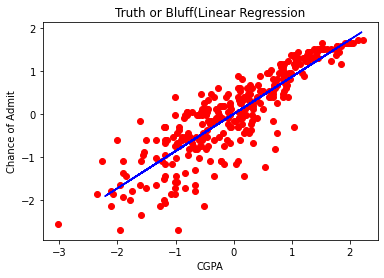

In [44]:

plt.scatter(x_train, y_train,color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Truth or Bluff(Linear Regression')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.show()

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_rag = PolynomialFeatures(degree = 4)

In [46]:
x_poly = poly_rag.fit_transform(x_test)
lin_rag_2 = LinearRegression()
lin_rag_2.fit(x_poly, y_test)

LinearRegression()

In [47]:
y_poly_pred =lin_rag_2.predict(x_poly)
y_poly_pred

array([[ 0.4666045 ],
       [ 1.28208328],
       [ 0.94324508],
       [-1.41927159],
       [-0.27837075],
       [ 0.24126311],
       [-1.41927159],
       [ 0.24126311],
       [-0.10777468],
       [-0.59578884],
       [-0.91904708],
       [ 0.09741096],
       [ 0.91227621],
       [ 0.24126311],
       [ 1.52513397],
       [-1.51078776],
       [-1.4344099 ],
       [ 0.30552517],
       [ 0.12927109],
       [ 0.88113595],
       [-0.07644469],
       [-0.62549522],
       [ 1.707605  ],
       [ 0.22522401],
       [ 1.00461055],
       [ 0.70741053],
       [-0.17015214],
       [-0.58090489],
       [-2.04188757],
       [ 0.57929211],
       [-0.47610425],
       [-0.99186221],
       [-1.10843857],
       [-0.87530692],
       [ 1.24014726],
       [-0.12340477],
       [-0.20119573],
       [ 1.707605  ],
       [-0.2475757 ],
       [-0.91904708],
       [ 0.81839713],
       [ 1.30957125],
       [-0.2937306 ],
       [ 1.06511241],
       [ 0.89672661],
       [-0

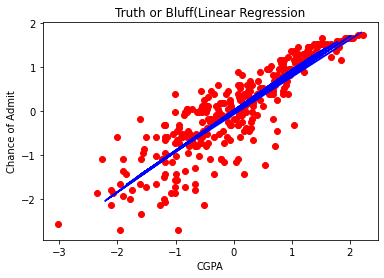

In [49]:
plt.scatter(x_train,y_train, color = 'red')
#plt.plot(x, lin_rag_2.predict(poly_rag.fit_transform(x)), color = 'blue')
plt.plot(x_test, y_poly_pred, color = 'blue')
plt.title('Truth or Bluff(Linear Regression')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.show()

# CORRELATION

In [50]:
#finding correlation between the data
Admission.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


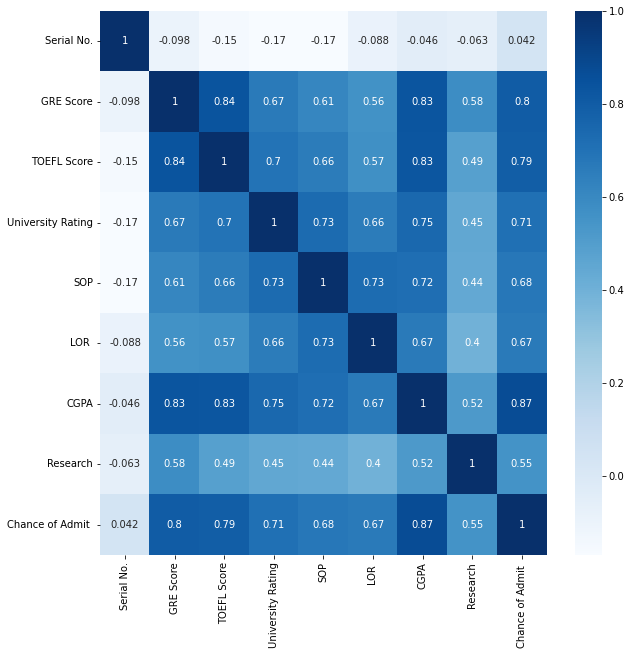

In [52]:
import seaborn as sns
plt.figure(figsize=(10,10))
correlation = Admission.corr()
sns.heatmap(correlation, annot = True, cmap = 'Blues')